In [3]:
"""
1. Reading the CSV File:
- Load the provided CSV file into a pandas DataFrame.
- Display the first 5 rows of the DataFrame to understand the structure of the data.

"""

import pandas as pd
acc_players = pd.read_csv("acc_players-2324F.csv", sep=",", header=1)

acc_players.head(5)

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


In [4]:
"""
2. Basic Analysis:
- Calculate the total points scored by all players combined.
- Find the player who has played the most minutes (MP).
- Identify the top 5 players in terms of total rebounds (TRB).

"""

total_points = acc_players["PTS"].sum()
print("Total points:", total_points)
print()

most_minutes_player = acc_players.loc[acc_players["MP"].idxmax()]
print("Player with the most minutes:", most_minutes_player["Player"])
print()

top_rebounders = acc_players.sort_values(by="TRB", ascending=False).head(5)
print("Top five rebounders: ")
print(top_rebounders["Player"])

Total points: 38411

Player with the most minutes: Casey Morsell

Top five rebounders: 
5        Armando Bacot
178    Ian Schieffelin
90     Harrison Ingram
44      Mohamed Diarra
149      Norchad Omier
Name: Player, dtype: object


In [5]:
"""
3. Player Filtering:
- Create a new DataFrame containing only players who played more than 500 minutes.
- From this filtered DataFrame, determine the player with the highest total assists (AST).
- Who are the top 3 Assist Leads in the League?
- Who are the top 3 Shot Blockers?

"""

more_than_500_minutes = acc_players[acc_players["MP"] > 500]
top_assisters = more_than_500_minutes.sort_values(by="AST", ascending=False).head(3)
print("Player with the highest total assists:")
print(top_assisters["Player"].head(1))
print()

print("Top three assist leads:")
print(top_assisters["Player"].head(3))
print()

top_blockers = acc_players.sort_values(by="BLK", ascending=False).head(3)
print("Top three blockers:")
print(top_rebounders["Player"].head(3))

Player with the highest total assists:
7    Reece Beekman
Name: Player, dtype: object

Top three assist leads:
7       Reece Beekman
215    Jaeden Zackery
21      Elliot Cadeau
Name: Player, dtype: object

Top three blockers:
5        Armando Bacot
178    Ian Schieffelin
90     Harrison Ingram
Name: Player, dtype: object


In [6]:
"""
4. School-Based Analysis:
- Group the players by School and calculate the total points scored by each school.
- Group the players by School and calculate the total assists (AST) for each team.
- Sort the schools by total points scored and display the top 3 schools.

"""

points_by_school = acc_players.groupby("School")["PTS"].sum()
print("Total points scored by each school:")
print(points_by_school)
print()

assists_by_school = acc_players.groupby("School")["AST"].sum()
print("Total assists by each school:")
print(assists_by_school)

points_by_school = points_by_school.sort_values(ascending=False)
print("Top three schools by total points:")
print(points_by_school.head(3))

Total points scored by each school:
School
Boston College    2667
Clemson           2785
Duke              2830
Florida State     2526
Georgia Tech      2272
Louisville        2304
Miami (FL)        2424
NC State          3101
North Carolina    3032
Notre Dame        2113
Pittsburgh        2495
Syracuse          2442
Virginia          2140
Virginia Tech     2547
Wake Forest       2733
Name: PTS, dtype: int64

Total assists by each school:
School
Boston College    509
Clemson           533
Duke              551
Florida State     406
Georgia Tech      425
Louisville        356
Miami (FL)        454
NC State          536
North Carolina    536
Notre Dame        335
Pittsburgh        452
Syracuse          442
Virginia          509
Virginia Tech     514
Wake Forest       429
Name: AST, dtype: int64
Top three schools by total points:
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


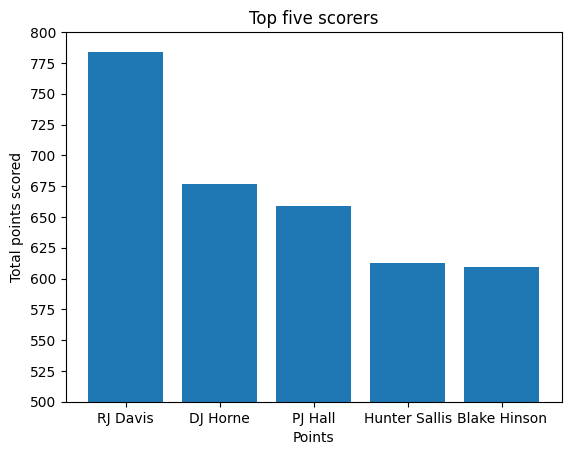


The correlation coefficient between FG% and WS is: 0.4210663894199787



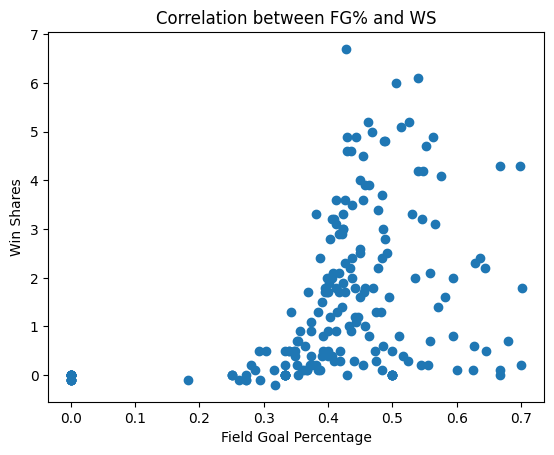

In [12]:
"""
5. Extra Credit (Bonus):
- Create a bar chart showing the top 5 players by total points scored (PTS).
- Correlation: Investigate whether there is any correlation between a player's field goal
percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
correlation coefficient.

"""

import matplotlib.pyplot as plt

top_scorers = acc_players.sort_values(by="PTS", ascending=False).head(5)
plt.bar(top_scorers["Player"], top_scorers["PTS"])
plt.xlabel('Points')
plt.ylabel('Total points scored')
plt.title('Top five scorers')
# Formatting for readability
plt.yticks([500,525,550,575,600,625,650,675,700,725,750,775,800])
plt.ylim(500,800)
plt.show()
print()

field_goal_percentage = acc_players["FG%"]
win_shares = acc_players["WS"]
correlation = field_goal_percentage.corr(win_shares)
print("The correlation coefficient between FG% and WS is:", correlation)
print()

plt.scatter(field_goal_percentage, win_shares)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Shares')
plt.title('Correlation between FG% and WS')
plt.show()

What did you learn about working with CSV files and pandas DataFrames in
this assignment?

I learned how to read csv files and load them into pandas dataframes. I also got comfortable using the .loc function combined with dataframe queries in order to filter specific data. I also got comfortable manipulating the data set through extraction, sorting, or grouping in order to display data in various ways. I also got comfortable selecting data by filtering and manipulating and displaying them using the matplotlib library. These skills will definitely help me in the future by allowing me to parse through a large amount of data, filter out key data points, and display the data in a way that makes it easier to discover patterns and derive insights.



What was the most challenging aspect of this assignment, and how did you
overcome it?

The most challenging aspect of this assignment was finding the correct functions to call and the correct arguments and dataframe queries pass in the function in order to attain the desired data. I usually overcome challenges like this, which are common place in coding as you learn a new coding language, by searching up how to perform the operation that I'm looking for on stack overflow. Usually, there will be someone who had the same question about the procedure that matches mine and I can get an explanation on how to do it from other users. If I have trouble passing in arguments to a function because I don't know the format of the function, I will search up documentation of that function on the internet.


How do you think the insights gained from analyzing ACC basketball statistics
could be applied to other real-world datasets?
• Consider the broader implications of using data analysis techniques on
different datasets, whether in sports, business, healthcare, or other fields, and
discuss how this experience prepares you for future data science challenges.

I think the ability to find specific players or group players by specific attributes or ranges of statistics would be useful in many other fields. Being able to find maxes and mins could be used in healthcare in order to find high risk patients based on a certain levels of risk indicators. Being able to identify subgroups can also be useful in consumer segmentation for marketing or identify a confounding variable in a data set which could be influence the group without being understood. The implications of these skills will definitely help me in future endeavors as I seek use data in order to find trends and create solutions for perhaps climate change or public transport implementation.
